In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-dead-placement-data/Placement_Data_Full_Class.csv


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("/kaggle/input/brain-dead-placement-data/Placement_Data_Full_Class.csv",
                index_col = 'sl_no')
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


<AxesSubplot:>

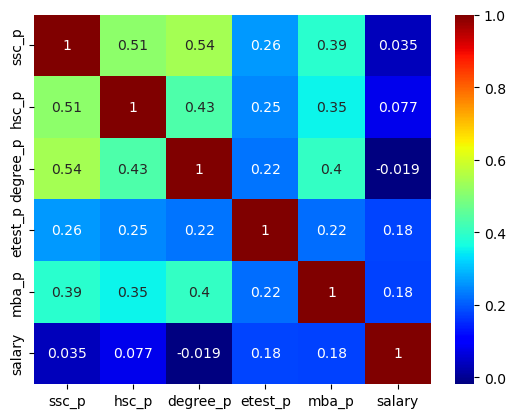

In [3]:
sns.heatmap(df.corr(), annot=True, cmap='jet')

In [4]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [5]:
placed_df = df[df['status'] == 'Placed']
unplaced_df = df[df['status'] == 'Not Placed']

In [6]:
placed_df.salary.agg(['max', 'min', 'mean', 'median'])

max       940000.000000
min       200000.000000
mean      288655.405405
median    265000.000000
Name: salary, dtype: float64

Obs: salary of peeps are on the lower side of spectrum (expected)

In [7]:
sns.set(font_scale=0.5)

In [8]:
def hist_plot_col(df, suptitle):
    fig, ax = plt.subplots(nrows=4, ncols=4)
        
    for a, column in zip(ax.ravel(), df.columns) :
        sns.histplot(df[column], ax=a)

    plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.5,
                    hspace=0.5)
    fig.suptitle(suptitle)
    plt.show()

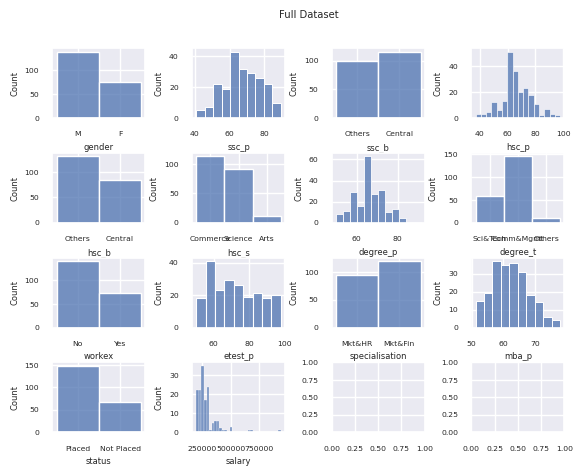

In [9]:
hist_plot_col(df, "Full Dataset")

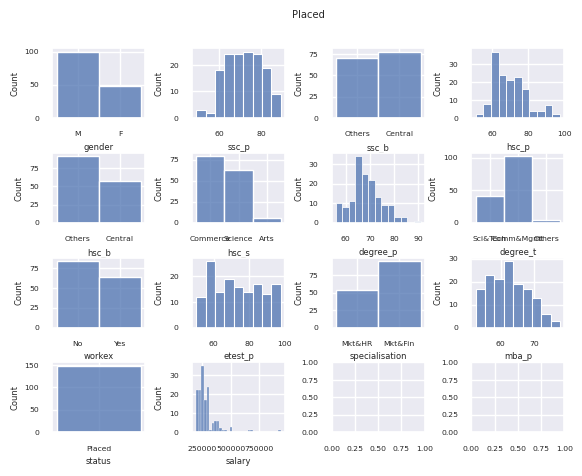

In [10]:
hist_plot_col(placed_df, "Placed")


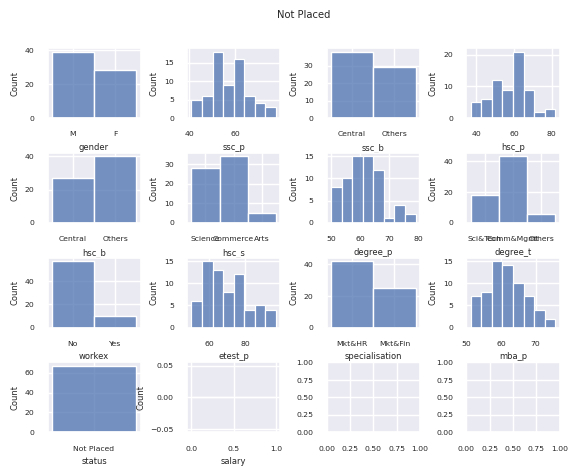

In [11]:
hist_plot_col(unplaced_df, "Not Placed")

Obs: in general, peeps who had work exp got placed

In [12]:
mkt_fin_df = df[df.specialisation == 'Mkt&Fin']
mkt_hr_df = df[df.specialisation == 'Mkt&HR']

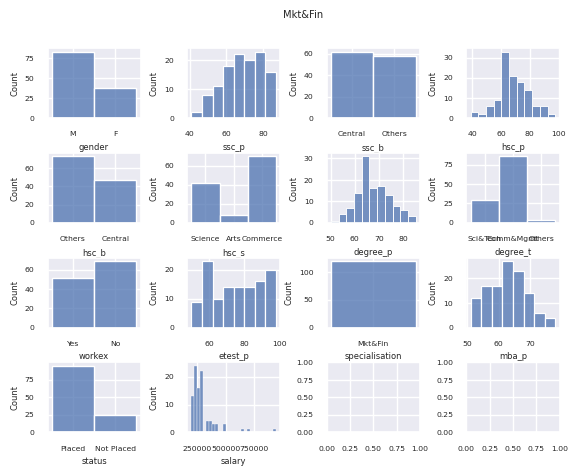

In [13]:
hist_plot_col(mkt_fin_df, 'Mkt&Fin')

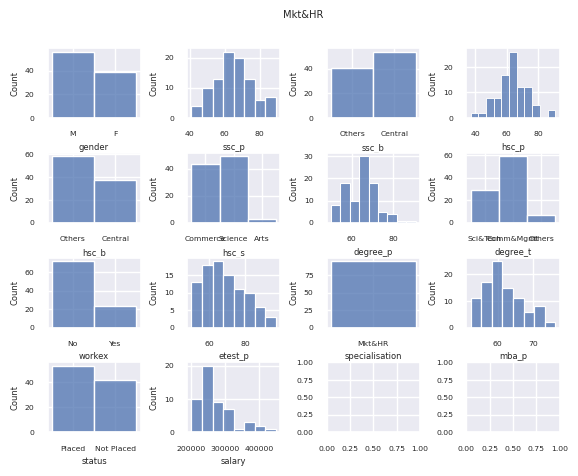

In [14]:
hist_plot_col(mkt_hr_df, 'Mkt&HR')

Obs: more people from Mkt&Fin got prev work exp wrt Mkt&HR

In [15]:
mkt_hr_df.etest_p.agg(['max','min', 'mean', 'median'])

max       97.000000
min       50.000000
mean      68.582737
median    67.000000
Name: etest_p, dtype: float64

In [16]:
mkt_fin_df.etest_p.agg(['max', 'min', 'mean', 'median'])

max       98.0000
min       50.0000
mean      74.8855
median    75.0000
Name: etest_p, dtype: float64

Obs: etest_p of mkt&fin is on the higher side than mkt&hr

Obs: mkt&fin got better offers generally (check)

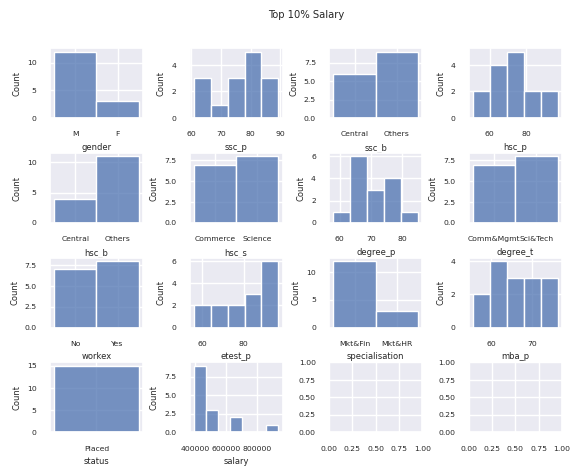

In [17]:
top_10th_percentile_df = df[df.salary >= df.salary.quantile(0.9)]
hist_plot_col(top_10th_percentile_df, 'Top 10% Salary')

Obs: Mkt&Fin lads got higher packages than Mkt&Hr(again)

Obs: lads who took Comm&Mgmt and Sci&Tech got higer packages than lads who took others

Obs: Top 10% had very good etest_p

In [18]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [19]:
df.gender.dtypes == 'O'

True

In [20]:
for col in df.columns:
    if df[col].dtypes == 'O':
        print(col)

gender
ssc_b
hsc_b
hsc_s
degree_t
workex
specialisation
status


<AxesSubplot:xlabel='etest_p', ylabel='specialisation'>

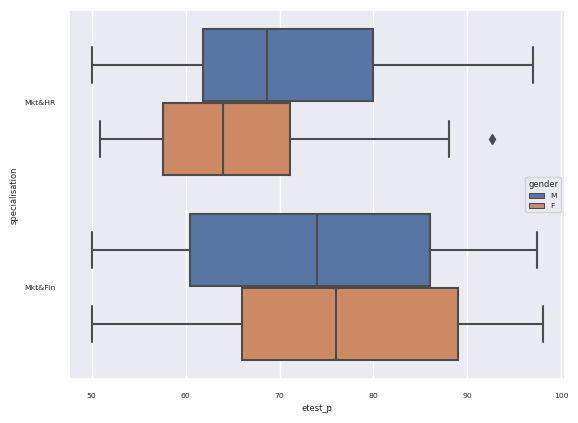

In [21]:
sns.boxplot(df, y='specialisation', x = "etest_p", hue="gender")

<AxesSubplot:xlabel='etest_p', ylabel='specialisation'>

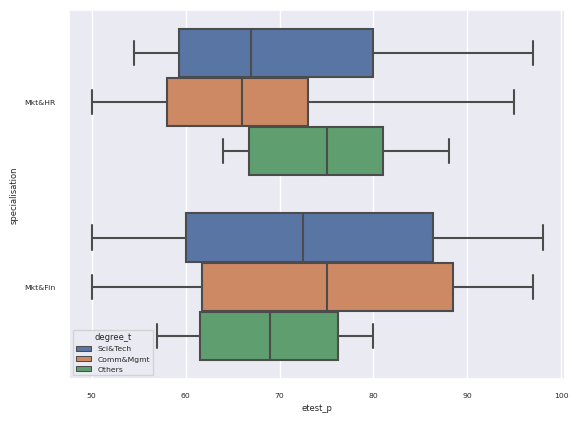

In [22]:
sns.boxplot(df, y='specialisation', x = "etest_p", hue="degree_t")

<AxesSubplot:xlabel='salary', ylabel='specialisation'>

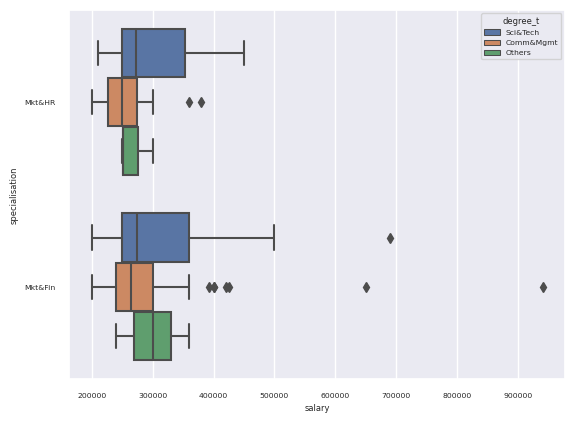

In [23]:
sns.boxplot(df, y='specialisation', x = "salary", hue="degree_t")

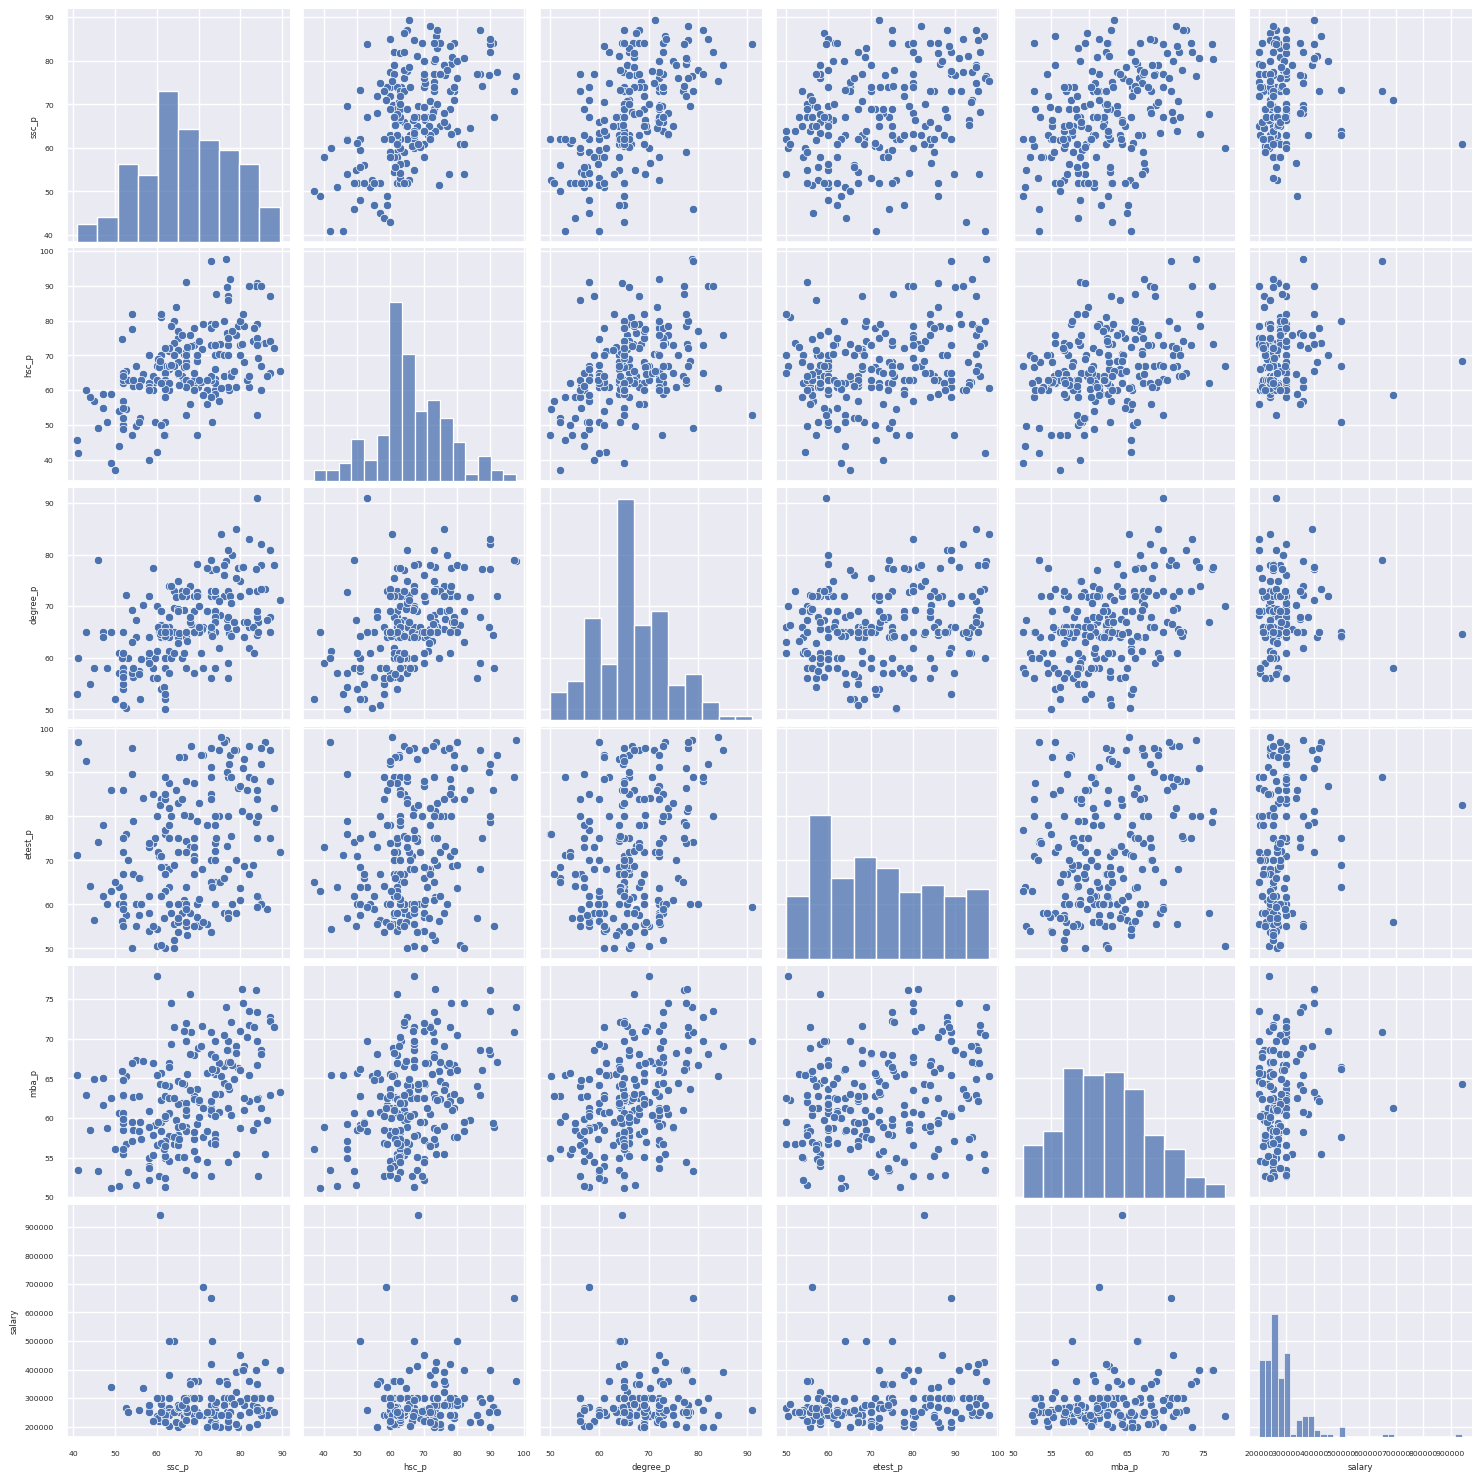

In [24]:
sns.pairplot(df)

Obs: hhc_p , ssc_p, degree_p are linearly proportaional

Text(0.5, 1.0, 'Max Salary Based on Gender in Given Dataset')

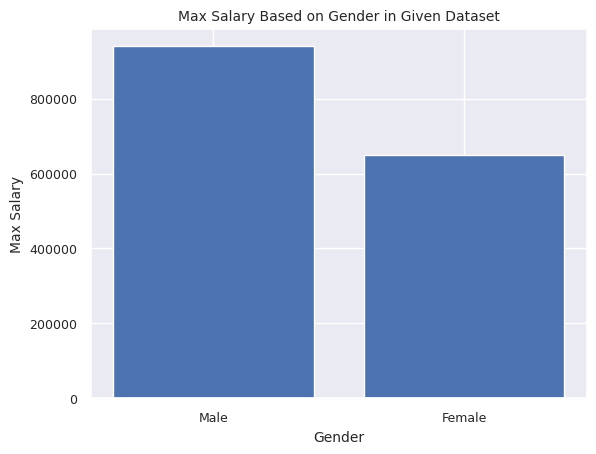

In [25]:
m_df = df[df.gender == 'M']
f_df = df[df.gender == 'F']
max_m_sal = m_df.salary.max()
max_f_sal = f_df.salary.max()

plt.bar(['Male', 'Female'], [max_m_sal, max_f_sal],)
plt.yticks(fontsize=9)
plt.xticks(fontsize=9)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Max Salary', fontsize=10)
plt.title('Max Salary Based on Gender in Given Dataset', fontsize=10)